# <h1 style="font-family: Trebuchet MS; padding: 5px; font-size: 48px; color: #0066b2; text-align: center; line-height: 1;"><b>Fraud Detection<span style="color: #000000"> Data preprocessing </span></b></h1>


<a id="0"></a>

----

  
## Table of Contents
1. [Context](#context)
2. [Import Necessary Libraries](#import-libraries)
3. [Import Data](#import-data)
4. [Data preprcessing](#data-exploration)
   

---


<a id="context"></a>


# **Context**


Fraud detection analytics involves preprocessing fraud data to extract information. 

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
---
  
## **Content**
``Unnamed: 0`` - Index or identifier for the data entries.

``trans_date_trans_time`` - Date and time of the transaction.

``cc_num`` - Credit card number used for the transaction.

``merchant`` - Merchant or vendor involved in the transaction.

``category`` - Category or type of transaction.

``amt`` - Transaction amount.

``first`` - First name of the credit card holder.

``last`` - Last name of the credit card holder.

``gender`` - Gender of the credit card holder.

``street`` - Street address of the credit card holder.

``city`` - City of the credit card holder.

``state`` - State of the credit card holder.

``zip`` - ZIP code of the credit card holder.

``lat`` - Latitude coordinate associated with the transaction.

``long`` - Longitude coordinate associated with the transaction.

``city_pop`` - Population of the city where the transaction occurred.

``job`` - Occupation or job of the credit card holder.

``dob`` - Date of birth of the credit card holder.

``trans_num`` -  Transaction number or identifier.

``unix_time`` - Transaction time in UNIX timestamp format.

``merch_lat`` - Latitude coordinate of the merchant's location.

``merch_long`` - Longitude coordinate of the merchant's location.

``is_fraud`` - Indicator for whether the transaction is fraudulent (binary: 1 for fraud, 0 for non-fraud).

<a id="import-libraries"></a>

# **Import Necessary Libraries**

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>

In [237]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from dateutil.relativedelta import relativedelta
import sys

In [238]:
print("Python: {}".format(sys.version))
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("MatplotLib: {}".format(matplotlib.__version__))
print("Seaborn: {}".format(sns.__version__))

Python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.23.5
Pandas: 1.5.3
MatplotLib: 3.7.0
Seaborn: 0.12.2


In [239]:
data = pd.read_csv("../data/fraudTrain.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data preprocessing

# Data Extraction

In [240]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['hour'] = data['trans_date_trans_time'].dt.hour
data['minute'] = data['trans_date_trans_time'].dt.minute
data['second'] = data['trans_date_trans_time'].dt.second

In [241]:
data['dob'] = pd.to_datetime(data['dob'])
current_date = datetime.now()
data['age'] = data['dob'].apply(lambda x: relativedelta(current_date, x).years)
data[['dob', 'age']]

,dob,age
0,1988-03-09,35
1,1978-06-21,45
2,1962-01-19,61
3,1967-01-12,56
4,1986-03-28,37
...,...,...
1296670,1961-11-24,61
1296671,1979-12-11,43
1296672,1967-08-30,56
1296673,1980-08-18,43


In [242]:
data=data.drop(['dob','trans_date_trans_time','Unnamed: 0','year'],axis=1)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  object 
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   first       1296675 non-null  object 
 5   last        1296675 non-null  object 
 6   gender      1296675 non-null  object 
 7   street      1296675 non-null  object 
 8   city        1296675 non-null  object 
 9   state       1296675 non-null  object 
 10  zip         1296675 non-null  int64  
 11  lat         1296675 non-null  float64
 12  long        1296675 non-null  float64
 13  city_pop    1296675 non-null  int64  
 14  job         1296675 non-null  object 
 15  trans_num   1296675 non-null  object 
 16  unix_time   1296675 non-null  int64  
 17  merch_lat   1296675 non-null  float64
 18  merch_long  1296675 no

In [244]:
data.duplicated().sum()

0

In [245]:
data.isna().sum()

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
month         0
day           0
hour          0
minute        0
second        0
age           0
dtype: int64

In [246]:
numerical = data.select_dtypes(['int64', 'float64']).columns 
categorical = data.select_dtypes(['category', 'object']).columns 

In [247]:
categorical

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num'],
      dtype='object')

In [11]:
numerical = data.select_dtypes(['int64', 'float64']).columns 
categorical = data.select_dtypes(['category', 'object']).columns 
scaler = StandardScaler()
data[[i for i in numerical if i!='is_fraud']] = scaler.fit_transform(data[[i for i in numerical if i!='is_fraud']])
label_encoder = LabelEncoder()
data[categorical] = data[categorical].apply(label_encoder.fit_transform)

In [12]:
label_encoder = LabelEncoder()
data[categorical] = data[categorical].apply(label_encoder.fit_transform)

In [13]:
X = data.drop('is_fraud', axis=1) 
y = data['is_fraud'] 


In [32]:
pip install boruta

     -------------------------------------- 56.6/56.6 kB 371.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# SMOTE 

In [54]:
data.shape

(1296675, 26)

In [33]:
from boruta import BorutaPy

In [45]:
from imblearn.over_sampling import SMOTE

shuffled_data = shuffle(data, random_state=42)

X_sampled = shuffled_data.drop('is_fraud', axis=1)
y_sampled = shuffled_data['is_fraud']

smote = SMOTE(random_state=42, k_neighbors=3)
X_sampled, y_sampled = smote.fit_resample(X_sampled, y_sampled)


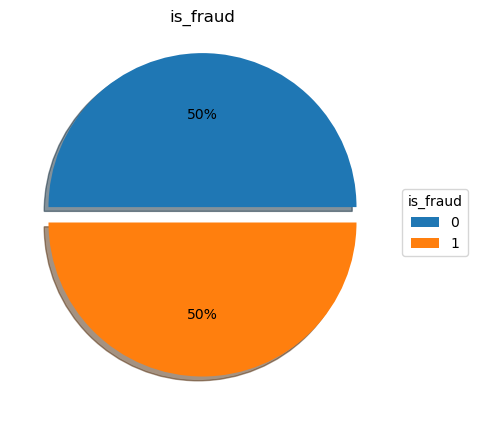

In [51]:
highlight = (0.1, 0)

fig, axs = plt.subplots(1, 1, figsize=(20, 5))
wedges, texts, autotexts = axs.pie(y_sampled.value_counts(), autopct='%1.0f%%', shadow=True, explode=highlight)

axs.set_title('is_fraud')
axs.legend(wedges, y_sampled.unique(), title='is_fraud', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()


In [53]:
X_sampled.shape

(2578338, 25)

In [56]:
data_smote=X_sampled
data_smote["is_fraud"]=y_sampled
data_smote = shuffle(data_smote, random_state=42)
data_smote

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,month,day,hour,minute,second,age,is_fraud
404196,-0.318735,25,4,0.390223,92,478,0,541,799,43,1.032875,-1.565391,-0.513331,-0.288315,349,96106,0.430418,-1.428081,-0.487136,1.713973,-1.085950,-1.144773,-1.010110,0.433017,-0.145137,0
137356,-0.315007,327,8,-0.420863,214,426,0,27,297,43,1.013242,-1.233247,-0.509392,-0.274707,387,936031,0.746980,-1.382953,-0.554488,-1.504564,0.726236,-0.998099,-0.375013,0.317512,-1.065000,0
2232713,-0.318676,282,11,5.774690,166,136,0,333,620,25,0.002093,0.191515,-0.293162,-0.265244,63,140912,-0.029077,0.238009,-0.308378,0.892030,0.801454,1.348692,0.156953,0.075925,-0.059996,1
1000863,-0.318735,496,7,-0.154888,193,424,0,196,554,9,-0.546185,-2.446748,0.617065,0.619883,341,878074,-0.553778,-2.592683,0.634112,0.251002,-0.406380,1.348692,0.202349,0.490769,2.269503,0
2411018,-0.185695,580,1,0.479788,235,340,0,299,397,24,0.588041,0.034542,-0.325538,1.449675,122,1198780,-1.338564,0.074867,-0.339226,-0.810650,-0.986717,-1.737527,0.816517,-1.299547,-0.832660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-0.314164,195,0,0.079773,180,76,1,429,101,21,-1.642967,1.126221,1.574949,-0.291434,276,1179496,0.366469,1.272493,1.519962,1.421379,1.179282,0.615320,-1.356527,-1.068539,-0.087645,0
1692743,-0.315465,458,4,1.106960,100,62,1,421,63,13,0.013081,0.804250,-0.185075,-0.284477,105,835606,-0.780873,0.833896,-0.165043,-0.238377,1.644925,-1.768366,1.147071,1.298636,0.485595,1
2356330,-0.318187,473,2,0.014832,84,83,0,302,765,11,-0.671359,-1.810901,0.781393,0.917502,246,1131912,-0.493708,-1.698167,0.741102,-0.501941,0.712648,-1.616087,1.123049,-0.588044,0.578490,1
2229084,-0.316028,200,10,5.877107,182,431,1,564,428,42,1.055812,-1.806579,-0.378934,-0.201775,214,1123820,-1.082946,-1.973098,-0.323998,-0.636227,1.109806,1.253985,-0.352693,-0.038275,-1.430270,1


# Feature selection

In [127]:
rf = RandomForestClassifier(random_state=23, max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=999)

sampled_data = data_smote.sample(n=50, random_state=42)

X_sampled = sampled_data.drop('is_fraud', axis=1)
y_sampled = sampled_data['is_fraud']


result_boruta = feat_selector.fit(X_sampled.values, y_sampled)
accept = X_sampled.columns[feat_selector.support_].to_list()
irresolution = X_sampled.columns[feat_selector.support_weak_].to_list()

print("Features selected:")
list(accept)


Features selected:


['cc_num',
 'category',
 'amt',
 'first',
 'last',
 'state',
 'zip',
 'city_pop',
 'job',
 'unix_time',
 'merch_long',
 'month',
 'day',
 'hour',
 'second',
 'age']

In [178]:
sampled_data = data_smote.sample(n=50000, random_state=42)

X_sampled = sampled_data.drop('is_fraud', axis=1)
y_sampled = sampled_data['is_fraud']


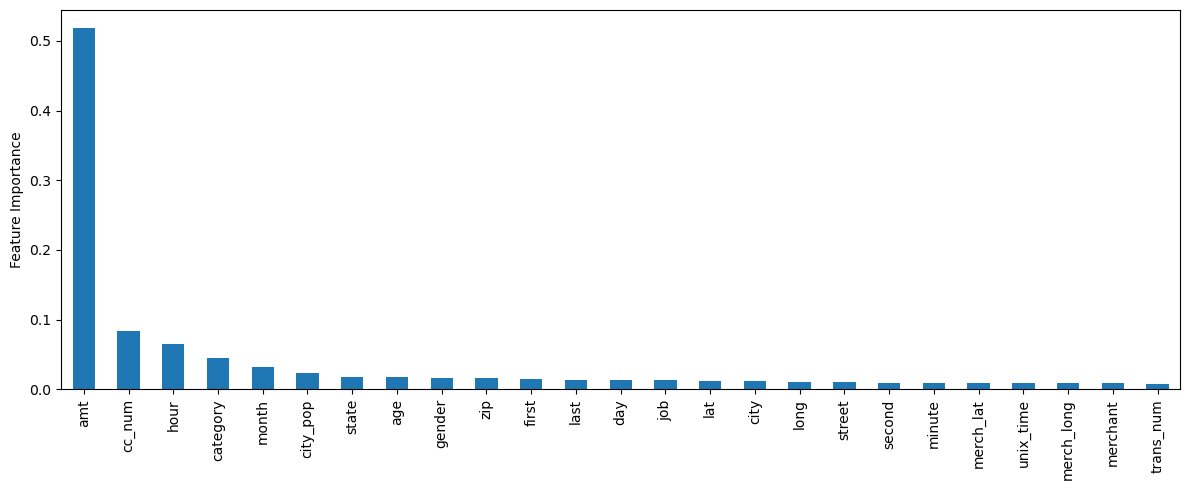

In [179]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_sampled, y_sampled)

feature_importances = model.feature_importances_
forest_importances = pd.Series(feature_importances, index=X_sampled.columns)
fig, ax = plt.subplots(figsize=(12, 5))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
fig.tight_layout();

In [180]:
len(forest_importances.sort_values(ascending=False))

25

In [181]:
forest_importances.sort_values(ascending=False)

amt           0.518245
cc_num        0.083768
hour          0.065090
category      0.044602
month         0.032387
city_pop      0.024201
state         0.018343
age           0.017132
gender        0.016721
zip           0.015917
first         0.015329
last          0.014184
day           0.013524
job           0.013040
lat           0.012395
city          0.011927
long          0.011105
street        0.010882
second        0.009294
minute        0.009202
merch_lat     0.009177
unix_time     0.008922
merch_long    0.008742
merchant      0.008679
trans_num     0.007192
dtype: float64

In [191]:
forest_importances.sort_values(ascending=False)[:10].sum()

0.8364049995060424

In [197]:
df= data_smote[["amt" ,    
"cc_num"        ,
"hour"          ,
"category"      ,
"month"         ,
"city_pop"      ,
"state"         ,
"age"           ,
"gender"        ,
"zip"           ,
"first"         ,
"last"          ,
"day"           ,
"job"           ,
"lat"          ,
                "fraud"]]
df

,amt,cc_num,hour,category,month,city_pop,state,is_fraud
404196,0.390223,-0.318735,-1.144773,4,1.713973,-0.288315,43,0
137356,-0.420863,-0.315007,-0.998099,8,-1.504564,-0.274707,43,0
2232713,5.774690,-0.318676,1.348692,11,0.892030,-0.265244,25,1
1000863,-0.154888,-0.318735,1.348692,7,0.251002,0.619883,9,0
2411018,0.479788,-0.185695,-1.737527,1,-0.810650,1.449675,24,1
...,...,...,...,...,...,...,...,...
110268,0.079773,-0.314164,0.615320,0,1.421379,-0.291434,21,0
1692743,1.106960,-0.315465,-1.768366,4,-0.238377,-0.284477,13,1
2356330,0.014832,-0.318187,-1.616087,2,-0.501941,0.917502,11,1
2229084,5.877107,-0.316028,1.253985,10,-0.636227,-0.201775,42,1


In [198]:
df.to_csv('../data/train_data.csv', index=False)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [199]:
# preprocessing for test data

In [227]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
ohe=OneHotEncoder()
X=data[["amt" ,    
"cc_num"        ,
"hour"          ,
"category"      ,
"month"         ,
"city_pop"      ,
"state"          ,"is_fraud"]]
X.drop("is_fraud", axis=1, inplace=True)
y=data["is_fraud"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
ohe.fit(X[['category', 'state']])

column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['category', 'state']),
    (StandardScaler(), ["amt",'cc_num', 'hour',"month","city_pop"]),
    remainder='passthrough'
)

C:\Users\MSI\AppData\Local\Temp\ipykernel_24340\2986853957.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("is_fraud", axis=1, inplace=True)


In [228]:
rf = RandomForestClassifier(n_estimators=20,max_depth=50,criterion='entropy', random_state=0)

pipe=make_pipeline(column_trans,rf)

In [229]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'], dtype=object),
                                                                            array...
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)]),
                                                  ['category', 'state']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['amt', 'cc_num', 'hour',
                                                   'month', 'city_pop'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=50,
                                        n_estimators=20, random_state=0))])

In [233]:
y_pred=pipe.predict(X_test)

In [235]:
from sklearn.metrics import f1_score,classification_report
print('Random foreast')
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Random foreast
0.7955390334572491
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257812
           1       0.92      0.70      0.80      1523

    accuracy                           1.00    259335
   macro avg       0.96      0.85      0.90    259335
weighted avg       1.00      1.00      1.00    259335

